In [2]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import numpy as np
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt


In [3]:
df = pd.read_excel('data.xlsx', sheet_name = 'dataframe')
df.sort_values(by="2019Q2_aktywa", ascending = False).head()


,Nazwa,2019Q2_aktywa,2019Q1_aktywa,2018Q2_aktywa,2019Q2_mobile,2019Q1_mobile,2018Q2_mobile,2019Q2_internet,2019Q1_internet,2018Q2_internet,...,2018Q2_placowki,2019Q2_partner,2019Q1_partner,2018Q2_partner,2019Q2_etat,2019Q1_etat,2018Q2_etat,2019Q2_etat_grupa,2019Q1_etat_grupa,2018Q2_etat_grupa
12,PKO BP,301339000,298403000,276088000,2136646,2012570,1534243,8680400,10935000,10262200,...,1176,535,557,600,24100,24200,24700,28100,27900,28500
2,Bank Pekao,189574297,189494130,178781524,889475,778537,623599,3340969,3330006,3171625,...,851,-1,-1,-1,14436,14591,15182,16613,16815,17307
14,Santander Bank Polska,181300141,185555589,147610558,1111843,1048828,814928,3904082,3825991,3259127,...,540,124,124,113,11113,11695,11174,14058,14642,14286
10,ING Bank Śląski,147057000,142042800,127108000,1372000,1288000,1014585,3975000,3894000,3605069,...,352,-1,-1,-1,7693,7644,7630,8119,8063,8026
11,mBank,143942202,142564251,132012206,1673786,1571093,1296379,3928090,3914732,3676510,...,140,41,41,41,5993,5919,5682,6677,6576,6358


In [4]:
def apply_scalers(df, columns_to_exclude = None):
    if columns_to_exclude:
        exclude_filter = ~df.columns.isin(columns_to_exclude)
    else:
        exclude_filter = ~df.columns.isin([])
    for column in df.iloc[:,exclude_filter].columns:
        df[column] = df[column].astype(float)

    df.loc[:,exclude_filter] = StandardScaler().fit_transform(df.loc[:,exclude_filter])
    return df

df = apply_scalers(df, columns_to_exclude=['Nazwa'])
df.sort_values(by='2019Q2_aktywa', ascending=False).head()

,Nazwa,2019Q2_aktywa,2019Q1_aktywa,2018Q2_aktywa,2019Q2_mobile,2019Q1_mobile,2018Q2_mobile,2019Q2_internet,2019Q1_internet,2018Q2_internet,...,2018Q2_placowki,2019Q2_partner,2019Q1_partner,2018Q2_partner,2019Q2_etat,2019Q1_etat,2018Q2_etat,2019Q2_etat_grupa,2019Q1_etat_grupa,2018Q2_etat_grupa
12,PKO BP,2.439176,2.451434,2.549791,2.272044,2.289286,2.208174,2.870860,3.180157,3.212267,...,2.699725,0.087071,0.104621,0.147944,2.867369,2.842515,2.940044,2.707886,2.691490,2.777432
2,Bank Pekao,1.170632,1.173505,1.287303,0.430077,0.354995,0.389769,0.495076,0.363630,0.395437,...,1.632315,-0.387541,-0.389552,-0.382783,1.243987,1.244292,1.360658,1.237344,1.274860,1.356310
14,Santander Bank Polska,1.076719,1.127290,0.882881,0.758496,0.778664,0.771821,0.745633,0.547319,0.430198,...,0.610887,-0.276857,-0.278850,-0.282112,0.685782,0.762614,0.695584,0.910259,0.997157,0.972748
10,ING Bank Śląski,0.688055,0.616714,0.616873,1.142726,1.153556,1.170503,0.777188,0.572506,0.567629,...,-0.006569,-0.387541,-0.389552,-0.382783,0.111283,0.088829,0.107505,0.149960,0.156381,0.177946
11,mBank,0.652702,0.622833,0.680502,1.588438,1.597291,1.733199,0.756316,0.580184,0.596010,...,-0.702848,-0.350351,-0.352356,-0.345694,-0.174287,-0.198083,-0.215740,-0.034642,-0.033653,-0.033832


In [5]:
exclude_filter = ~df.columns.isin(['Nazwa'])

fa = FactorAnalyzer(n_factors = 3, rotation = None)
fa.fit(df.loc[:,exclude_filter])
fa_loadings = fa.loadings_

C:\Users\lamla\miniconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [6]:
print("Ładunki czynnikowe (Factor loadings): \n", fa_loadings)

Ładunki czynnikowe (Factor loadings): 
 [[ 0.98172807  0.03706524  0.07550088]
 [ 0.97330157  0.01407379  0.0925633 ]
 [ 0.97049722 -0.02083197  0.03004717]
 [ 0.92008577  0.2182428  -0.27167014]
 [ 0.913445    0.22170699 -0.29338806]
 [ 0.90486932  0.24221299 -0.28706128]
 [ 0.97877617 -0.01570878 -0.19127932]
 [ 0.9566545  -0.13778599 -0.24153898]
 [ 0.95143973 -0.15780001 -0.25361051]
 [ 0.30989875  0.8947915  -0.22422188]
 [ 0.31370603  0.89583585 -0.19759545]
 [ 0.31428004  0.90345831 -0.1877983 ]
 [ 0.93609027  0.05148612 -0.11838136]
 [ 0.94182216  0.04542522 -0.10724034]
 [ 0.94653907  0.02502986 -0.118455  ]
 [ 0.98357138 -0.06577186 -0.10344528]
 [ 0.98251645 -0.07098431 -0.10120786]
 [ 0.96660983 -0.09309603 -0.15335518]
 [ 0.49421006  0.54562391  0.41025833]
 [ 0.49420717  0.52718413  0.47560274]
 [ 0.48944635  0.51410206  0.43469617]
 [ 0.98245028 -0.05721738 -0.08960602]
 [ 0.97813007 -0.05379412 -0.11064559]
 [ 0.97828442 -0.07870667 -0.11796908]
 [ 0.66703475  0.5208855

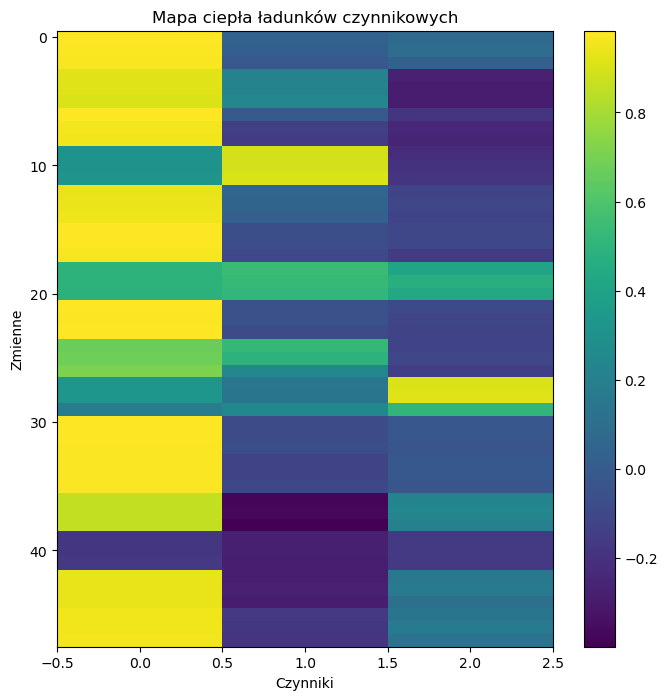

In [7]:
plt.figure(figsize = (8,8))
plt.title('Mapa ciepła ładunków czynnikowych')
plt.imshow(fa_loadings, cmap = 'viridis', aspect = 'auto')
plt.colorbar()
plt.xlabel('Czynniki')
plt.ylabel('Zmienne')
plt.show()

In [8]:
factors = fa.transform(df.loc[:,exclude_filter])
factors

C:\Users\lamla\miniconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


array([[ 7.09453255e-02,  2.82247981e-01,  1.37680912e+00],
       [ 3.68333639e-03,  9.59620690e-01,  1.58176110e-01],
       [ 1.04999548e+00, -4.88678913e-01,  3.19247314e+00],
       [-8.92423690e-01, -7.47732589e-01,  9.16593332e-02],
       [-8.20455812e-02, -4.64498397e-01,  1.94273879e-01],
       [-5.73087752e-01,  1.20539241e+00,  6.51353433e+00],
       [-9.06778178e-01,  7.04443769e-01,  5.51149763e-02],
       [-4.41251815e-01,  8.46017411e-01,  5.04478433e+00],
       [-1.13656431e+00, -2.40398259e+00, -6.81459067e+00],
       [-8.22111190e-01, -5.60232589e-01, -1.26771567e+00],
       [ 6.78281137e-01,  1.08509259e+00, -4.47859700e+00],
       [ 6.32947724e-01,  2.43409389e+00,  1.12701417e+00],
       [ 2.60368741e+00, -2.16658761e+00, -1.69585012e+00],
       [-1.24789244e+00, -1.21648259e+00, -5.00209067e+00],
       [ 1.03516495e+00,  1.45384103e+00,  1.53376538e+00]])

Dobór ilości czynników

In [9]:
eig_vals, eig_vecs = np.linalg.eig(df.loc[:,exclude_filter].cov())

In [10]:
total_var = df.loc[:,exclude_filter].var().sum()
print("Wariancja Całkowita: ", total_var)

Wariancja Całkowita:  51.42857142857143


In [11]:
eig_vals_sum = eig_vals.sum()
print("Suma wartości własnych: ", eig_vals_sum)

Suma wartości własnych:  (51.42857142857145+9.860761315262648e-32j)


In [12]:
np.set_printoptions(suppress = True)
var_exp = eig_vals / total_var
print("Proporcja wariancji wyjasniona przez kazda skladowa/czynnik \n", var_exp)

Proporcja wariancji wyjasniona przez kazda skladowa/czynnik 
 [ 0.68043041+0.j  0.11265742+0.j  0.07767792+0.j  0.05717656+0.j
  0.03990082+0.j  0.00972794+0.j  0.00748509+0.j  0.00705545+0.j
  0.00467391+0.j  0.00180032+0.j  0.00109996+0.j  0.00017179+0.j
  0.0000901 +0.j  0.00005231+0.j -0.        +0.j -0.        +0.j
 -0.        -0.j  0.        +0.j  0.        -0.j -0.        +0.j
 -0.        -0.j  0.        +0.j  0.        +0.j -0.        +0.j
  0.        +0.j  0.        -0.j  0.        +0.j  0.        +0.j
  0.        -0.j -0.        +0.j -0.        -0.j -0.        +0.j
 -0.        +0.j  0.        +0.j -0.        +0.j -0.        +0.j
 -0.        +0.j -0.        -0.j -0.        +0.j  0.        +0.j
  0.        +0.j  0.        -0.j -0.        +0.j -0.        -0.j
 -0.        +0.j -0.        +0.j  0.        +0.j  0.        +0.j]


C:\Users\lamla\miniconda3\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\lamla\miniconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


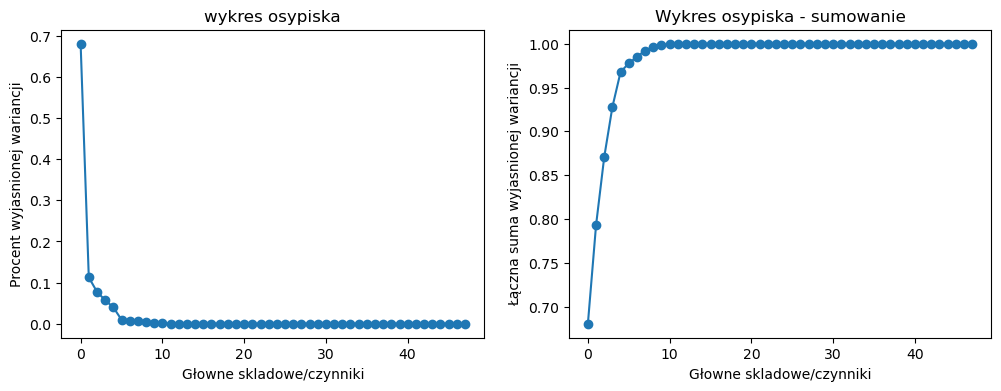

In [13]:
fig, ax = plt.subplots(1,2,figsize = (12,4))
ax[0].plot(var_exp, marker = 'o')
ax[0].set_title("wykres osypiska")
ax[0].set_xlabel("Głowne skladowe/czynniki")
ax[0].set_ylabel("Procent wyjasnionej wariancji")

ax[1].plot(np.cumsum(var_exp), marker = 'o')
ax[1].set_title("Wykres osypiska - sumowanie")
ax[1].set_xlabel("Głowne skladowe/czynniki")
ax[1].set_ylabel("Łączna suma wyjasnionej wariancji")

plt.show()


Kryterium wyjasnionej wariancji

In [14]:
print(np.cumsum(var_exp))

[0.68043041+0.j 0.79308783+0.j 0.87076575+0.j 0.92794232+0.j
 0.96784314+0.j 0.97757108+0.j 0.98505617+0.j 0.99211162+0.j
 0.99678552+0.j 0.99858584+0.j 0.9996858 +0.j 0.9998576 +0.j
 0.99994769+0.j 1.        +0.j 1.        +0.j 1.        +0.j
 1.        +0.j 1.        +0.j 1.        +0.j 1.        +0.j
 1.        +0.j 1.        +0.j 1.        +0.j 1.        +0.j
 1.        +0.j 1.        +0.j 1.        +0.j 1.        +0.j
 1.        +0.j 1.        +0.j 1.        +0.j 1.        +0.j
 1.        +0.j 1.        +0.j 1.        +0.j 1.        +0.j
 1.        +0.j 1.        +0.j 1.        +0.j 1.        +0.j
 1.        +0.j 1.        +0.j 1.        +0.j 1.        +0.j
 1.        +0.j 1.        +0.j 1.        +0.j 1.        +0.j]


Regula Kaisera

In [15]:
kaiser_rule = np.where(eig_vals > 1)[0]
print(kaiser_rule)

[0 1 2 3 4]
